In [1]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Users/yzhu/yzhu_work/gates projects")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
from data_analysis import *
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid
sys.path.append(r"/Users/yzhu/yzhu_work/gates projects/EAB")
from EAB_CB_data_analysis import *

In [2]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

/var/folders/6l/f5pw0tyx785dhvmqpb7282h00000gn/T/ipykernel_77237/1375469573.py:9: DeprecationWarning: The qiskit.extensions module is deprecated since Qiskit 0.46.0. It will be removed in the Qiskit 1.0 release.
  from qiskit.extensions import UnitaryGate


In [3]:
circuit_file_pathname="/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/to run-0916 II ancilla err meas/"

c_d2,circuit_count= read_circuit_file("/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/to run-0916 II ancilla err meas/d=2.txt")
print (circuit_count)

c_d8,circuit_count= read_circuit_file("/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/to run-0916 II ancilla err meas/d=8.txt")
print (circuit_count)

c_d16,circuit_count= read_circuit_file("/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/to run-0916 II ancilla err meas/d=16.txt")
print (circuit_count)

c_d32,circuit_count= read_circuit_file("/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/to run-0916 II ancilla err meas/d=32.txt")
print (circuit_count)


20
20
20
20


In [4]:
paf_data_d2="/Users/yzhu/yzhu_work/gates projects/EAB/data/0916 EAB FTXX13 II with anc twirl/2024-09-17 EAB__d=2/"
paf_data_d8="/Users/yzhu/yzhu_work/gates projects/EAB/data/0916 EAB FTXX13 II with anc twirl/2024-09-17 EAB__d=8/"
paf_data_d16="/Users/yzhu/yzhu_work/gates projects/EAB/data/0916 EAB FTXX13 II with anc twirl/2024-09-17 EAB__d=16/"
paf_data_d32="/Users/yzhu/yzhu_work/gates projects/EAB/data/0916 EAB FTXX13 II with anc twirl/2024-09-17 EAB__d=32/"

filenames_d2=read_data_file(paf_data_d2)
print (filenames_d2)
filenames_d4=[]
filenames_d8=read_data_file(paf_data_d8)
filenames_d16=read_data_file(paf_data_d16)
filenames_d32=read_data_file(paf_data_d32)

print (filenames_d8)
print (filenames_d16)
print (filenames_d32)

# filenames_d16_goodgates=read_data_file("/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 BT__d=16/good gates/")

['2024-09-16-175700_Line_001.txt', '2024-09-16-175730_Line_002.txt', '2024-09-16-175800_Line_003.txt', '2024-09-16-175829_Line_004.txt', '2024-09-16-175857_Line_005.txt', '2024-09-16-175927_Line_006.txt', '2024-09-16-175957_Line_007.txt', '2024-09-16-180027_Line_008.txt', '2024-09-16-180057_Line_009.txt', '2024-09-16-180126_Line_010.txt', '2024-09-17-142800_Line_011.txt', '2024-09-17-142830_Line_012.txt', '2024-09-17-142900_Line_013.txt', '2024-09-17-142928_Line_014.txt', '2024-09-17-142958_Line_015.txt', '2024-09-17-143029_Line_016.txt', '2024-09-17-143059_Line_017.txt', '2024-09-17-143126_Line_018.txt', '2024-09-17-143155_Line_019.txt', '2024-09-17-143227_Line_020.txt']
['2024-09-16-180333_Line_001.txt', '2024-09-16-180421_Line_002.txt', '2024-09-16-180504_Line_003.txt', '2024-09-16-180551_Line_004.txt', '2024-09-16-180637_Line_005.txt', '2024-09-16-180723_Line_006.txt', '2024-09-16-180812_Line_007.txt', '2024-09-16-180858_Line_008.txt', '2024-09-16-180945_Line_009.txt', '2024-09-16-

In [5]:
Set_Mapping([1,3,4,5,2])
nqubit=2
C=20

a=Quantum_State(5)
a_s=Quantum_State(5)
b_c=Quantum_Circuit(5,"qc")

spam1=SPAM_Operator(5)
spam1.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0516 FTXX 13452/spam/spam.csv")

# spam2=SPAM_Operator(5)
# spam2.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0424/SPAM1/SPAM1.csv")


In [6]:
Set_Mapping([1,3,4,5,2])
filenames_data=[]
counts_d2=[]
counts_d2_spam=[]
shots=2000
counts=[]
counts_spam=[]
filenames_data=filenames_d2.copy()
print (filenames_data)
# print (len(filenames_data))
paf_data=paf_data_d2
circuit=c_d2
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    # print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
    counts_d2.append(counts_ibm_mapping_dic)
    
    # a_s=spam1.Correct_SPAM(a)
    # data_traced_spam=Trace_Out(a_s,[0,1,2,3])
    # counts_spam=[round(shots*x) for x in  data_traced_spam.population]
    # counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
    # counts_d2_spam.append(counts_ibm_mapping_dic_spam)

    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    # Display_States_Population(states=[sim_traced,data_traced,data_traced_spam],label=["sim_traced","data_traced","spam_traced"])
        

['2024-09-16-175700_Line_001.txt', '2024-09-16-175730_Line_002.txt', '2024-09-16-175800_Line_003.txt', '2024-09-16-175829_Line_004.txt', '2024-09-16-175857_Line_005.txt', '2024-09-16-175927_Line_006.txt', '2024-09-16-175957_Line_007.txt', '2024-09-16-180027_Line_008.txt', '2024-09-16-180057_Line_009.txt', '2024-09-16-180126_Line_010.txt', '2024-09-17-142800_Line_011.txt', '2024-09-17-142830_Line_012.txt', '2024-09-17-142900_Line_013.txt', '2024-09-17-142928_Line_014.txt', '2024-09-17-142958_Line_015.txt', '2024-09-17-143029_Line_016.txt', '2024-09-17-143059_Line_017.txt', '2024-09-17-143126_Line_018.txt', '2024-09-17-143155_Line_019.txt', '2024-09-17-143227_Line_020.txt']
2024-09-16-175700_Line_001.txt
counts: [436, 16, 8, 0, 1177, 18, 23, 1, 92, 4, 12, 0, 187, 6, 20, 0]
counts sim: [0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-175730_Line_002.txt
counts: [1, 6, 0, 19, 1, 20, 10, 230, 1, 10, 9, 97, 3, 50, 38, 1505]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [7]:
filenames_data=[]
counts_d8=[]
counts_d8_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d8.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d8
circuit=c_d8
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    # counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d8.append(counts_ibm_mapping_dic)
    
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)

    # Display_States_Population(states=[sim_traced,data_traced,data_traced_spam],label=["sim_traced","data_traced","spam_traced"])

2024-09-16-180333_Line_001.txt
counts: [309, 8, 17, 1, 201, 7, 15, 1, 888, 28, 22, 0, 460, 17, 22, 4]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-180421_Line_002.txt
counts: [0, 9, 8, 126, 1, 22, 8, 295, 1, 25, 19, 349, 2, 42, 30, 1063]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000]
2024-09-16-180504_Line_003.txt
counts: [2, 10, 9, 250, 0, 29, 33, 1347, 0, 9, 4, 71, 0, 29, 4, 203]
counts sim: [0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-180551_Line_004.txt
counts: [10, 243, 7, 154, 6, 62, 4, 34, 42, 1123, 1, 30, 19, 248, 3, 14]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0]
2024-09-16-180637_Line_005.txt
counts: [0, 7, 3, 54, 0, 26, 8, 237, 3, 11, 12, 204, 2, 46, 39, 1348]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000]
2024-09-16-180723_Line_006.txt
counts: [447, 16, 16, 2, 904, 21, 29, 0, 170, 5, 7, 1, 348, 7, 26, 1]
counts sim: [0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-0

In [8]:
filenames_data=[]
counts_d16=[]
counts_d16_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d16.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d16
circuit=c_d16
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d16.append(counts_ibm_mapping_dic)
    
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

2024-09-16-181328_Line_001.txt
counts: [20, 9, 394, 25, 48, 8, 945, 41, 26, 7, 163, 11, 28, 11, 252, 12]
counts sim: [0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-181441_Line_002.txt
counts: [1, 22, 8, 263, 1, 37, 31, 717, 1, 17, 15, 244, 1, 29, 22, 591]
counts sim: [0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-181557_Line_003.txt
counts: [553, 24, 17, 1, 889, 28, 37, 2, 167, 9, 9, 2, 232, 7, 22, 1]
counts sim: [0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-181710_Line_004.txt
counts: [6, 92, 2, 10, 23, 497, 4, 41, 18, 185, 0, 17, 38, 1013, 3, 51]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0]
2024-09-16-181825_Line_005.txt
counts: [38, 2, 818, 31, 30, 2, 377, 37, 16, 0, 427, 11, 11, 0, 189, 11]
counts sim: [0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-182022_Line_006.txt
counts: [22, 700, 1, 31, 17, 208, 6, 18, 23, 684, 2, 35, 16, 224, 3, 10]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0,

In [9]:
filenames_data=[]
counts_d32=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d32.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d32
circuit=c_d32
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d32.append(counts_ibm_mapping_dic)
    
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

2024-09-16-182946_Line_001.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0]
2024-09-16-183208_Line_002.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0]
2024-09-16-183428_Line_003.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-183648_Line_004.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-183955_Line_005.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0]
2024-09-16-185029_Line_006.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-185256_Line_007.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0]
2024-09-16-185508_Line_008.txt
counts sim: [0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-185730_Line_009.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000]
2024-09-17-120431_Line_010.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0]
2024-09-17-120654_Line_011.txt
counts sim: [0, 0, 

In [10]:
import copy
from copy import copy, deepcopy

# copy.copy(x)
# copy.deepcopy(x)

# picklefile="c39b72eb-9de9-4338-b6ae-e478130a3f4fXX23541withpadding_set2"
with open("/Users/yzhu/yzhu_work/gates projects/EAB/circuits/0916 II ancilla err meas/033e3193-1437-4008-95e5-18cc59164f65II_ancilla_error_meas_expli_09162024", "rb") as fp:   # Unpickling
    eab_load = pickle.load(fp)
# print (picklefile)
# print (b)

# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/23541 EAB XX C=10 0424 /"+picklefile, "rb") as fp:   # Unpickling
#     eab_load_2 = pickle.load(fp)
# print (picklefile)

# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/23541 EAB XX C=10 0424 /"+picklefile, "rb") as fp:   # Unpickling
#     eab_load_3 = pickle.load(fp)
# print (picklefile)


C=20
eab_load_cpy=deepcopy(eab_load)
eab_load_cpy_spam=deepcopy(eab_load)
# eab_load_cpy_24=deepcopy(eab_load[0:20]) #a copy that only has depth=[2,4]


In [11]:
for i in range (C):
#     print (i)
    assert eab_load_cpy[i]["L"]==2
    eab_load_cpy[i]["counts"]=counts_d2[i].copy()


for i in range (2*C,3*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==8
    eab_load_cpy[i]["counts"]=counts_d8[i-2*C].copy()

for i in range (3*C,4*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==16
    eab_load_cpy[i]["counts"]=counts_d16[i-3*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

for i in range (4*C,5*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==32
    eab_load_cpy[i]["counts"]=counts_d32[i-4*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])


In [23]:
# print (eab_load_cpy)
# filename = str(uuid.uuid4())
# filename+="FTXX13_mapping1345_R_0516_00+11_ExperimentalData"
# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0516 FTXX 13452/13452 explicit CNOT FT R/results/"+filename, "wb") as fp:
#     pickle.dump(eab_load_cpy, fp)


In [12]:
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
import itertools
import pdb

'''Specify a set of Pauli you want to estimate'''
# C=10
C=20
nqubit=2
depth=[2,4,8,16,32]
pauli_request_list = [''.join(s) for s in itertools.product(['I','X','Y','Z'], repeat = nqubit)] #full

#process_EAB(Lrange, cb_data, pauli_request_list)
eab_result=EAB_process_modified.process_EAB(depth, eab_load_cpy, pauli_request_list)
# eab_result_spam=EAB_process_modified.process_EAB(depth, eab_load_cpy_spam, pauli_request_list)

for pauli in eab_result:
    print (eab_result[pauli])


{'II': {2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 32: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, 'IX': {2: [0.679, 0.713, 0.6, 0.734, 0.744, 0.726, 0.676, 0.765, 0.526, 0.632, 0.49, 0.485, 0.862, 0.742, 0.397, 0.511, 0.493, 0.838, 0.65, 0.845], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [0.441, 0.531, 0.68, 0.48, 0.665, 0.435, 0.796, 0.639, 0.642, 0.18, 0.555, 0.351, 0.749, 0.377, 0.201, 0.475, 0.488, 0.295, 0.38, 0.319], 16: [0.49, 0.08, 0.551, 0.325, 0.335, -0.003, 0.255, 0.377, 0.579, 0.0

In [23]:
print (eab_result["fidelity_list"])
for pauli in eab_result["fidelity_list"]:
    print (eab_result["fidelity_list"][pauli])
print (type (eab_result["fidelity_list"]))


{'II': {2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 32: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, 'IX': {2: [0.679, 0.713, 0.6, 0.734, 0.744, 0.726, 0.676, 0.765, 0.526, 0.632, 0.49, 0.485, 0.862, 0.742, 0.397, 0.511, 0.493, 0.838, 0.65, 0.845], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [0.441, 0.531, 0.68, 0.48, 0.665, 0.435, 0.796, 0.639, 0.642, 0.18, 0.555, 0.351, 0.749, 0.377, 0.201, 0.475, 0.488, 0.295, 0.38, 0.319], 16: [0.49, 0.08, 0.551, 0.325, 0.335, -0.003, 0.255, 0.377, 0.579, 0.0

Parameters: n = 2, C = 20,  L =  [2, 8, 16, 32]
Measurement based simulation, shots = 2000
No readout error
Total error =  0.05212162028946854
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.05565 0.0051636
YI 0.0572564 0.0052754
ZI 0.0030102 0.0002175
IX 0.0544322 0.0044298
XX 0.0921432 0.0065071
YX 0.0949263 0.0072977
ZX 0.0578113 0.0046133
IY 0.052807 0.0045963
XY 0.0918273 0.006669
YY 0.0945009 0.0071119
ZY 0.0563693 0.0048348
IZ 0.0025546 0.0001574
XZ 0.0570418 0.00501
YZ 0.0585216 0.0051963
ZZ 0.0050938 0.0002731


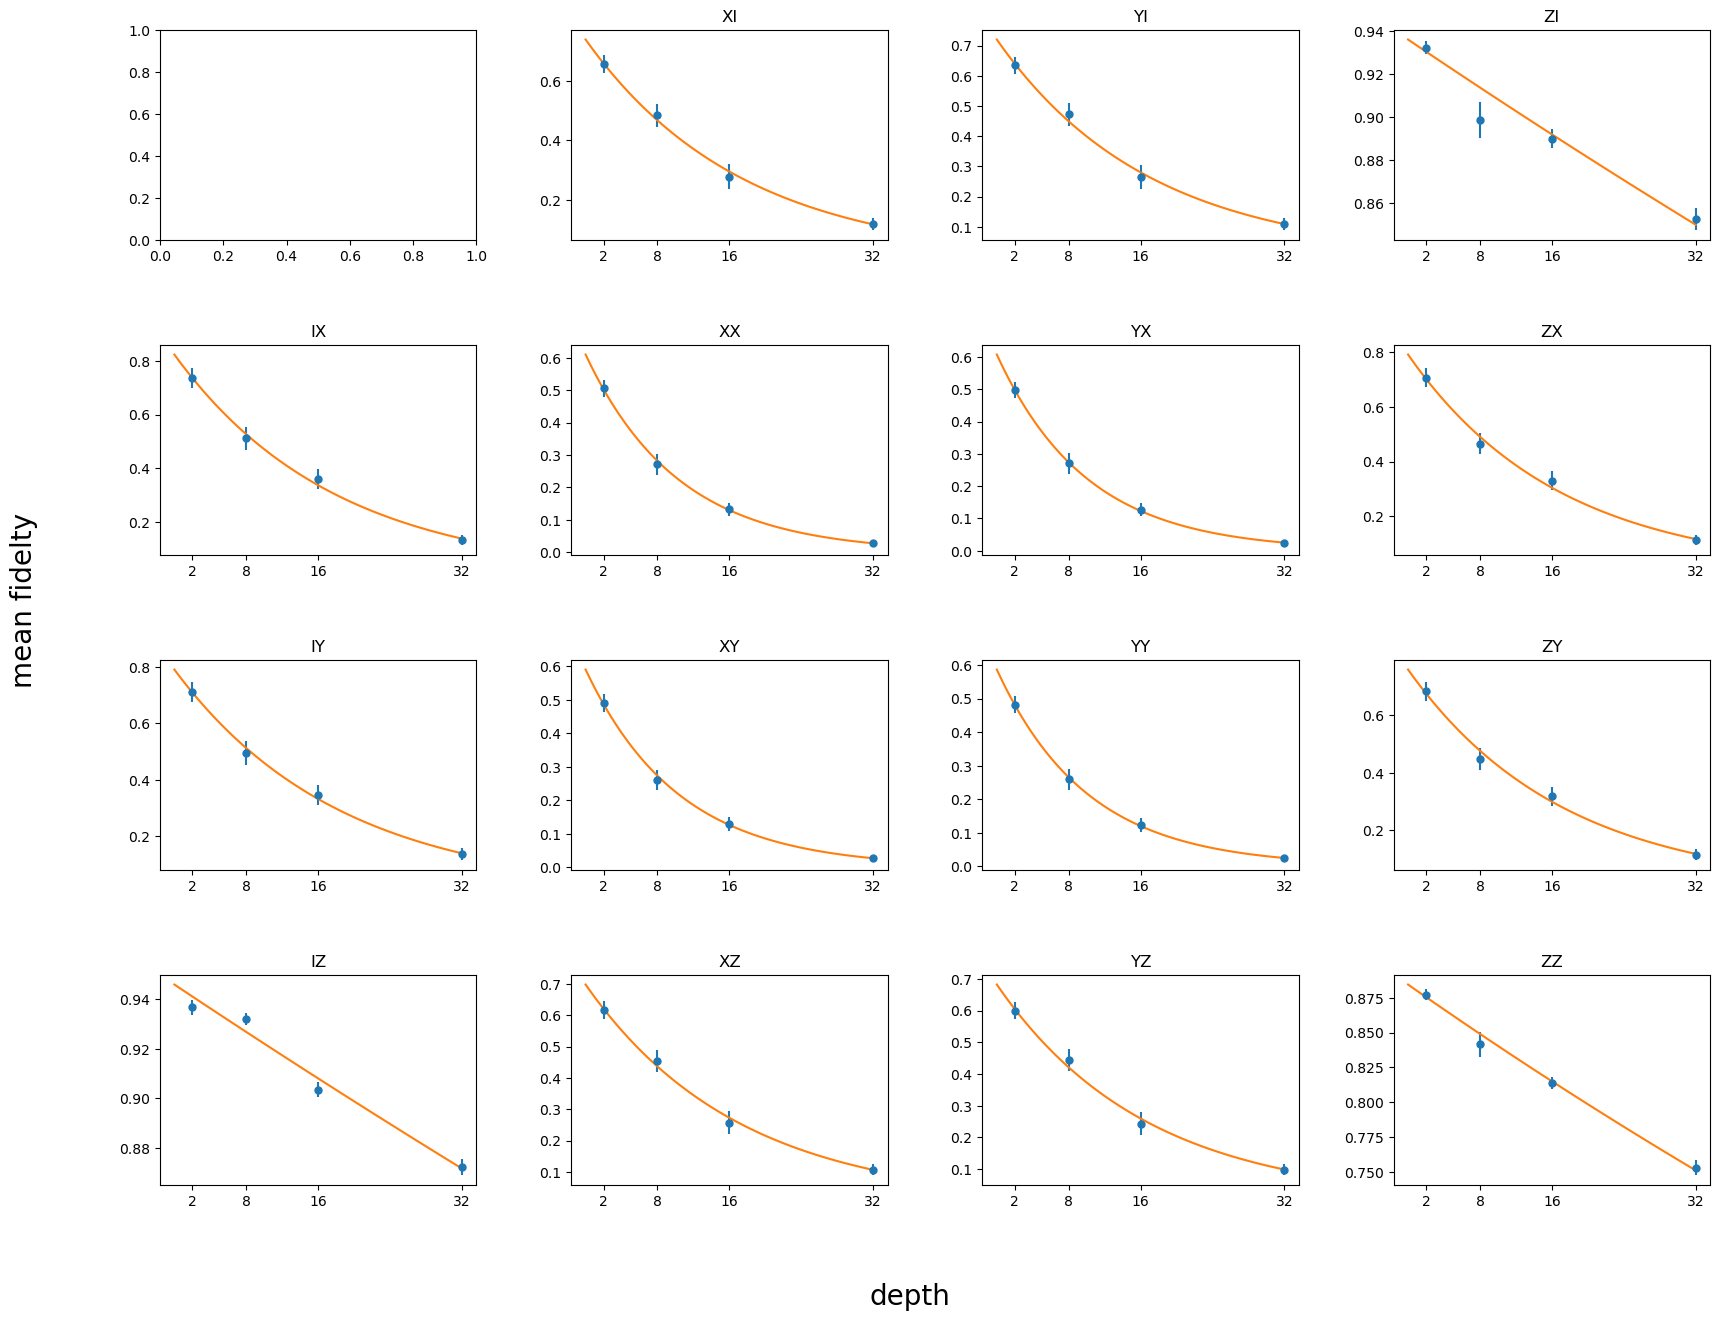

In [13]:
raw_fidelity_list = eab_result["fidelity_list"]
plot_dic={}
error_dic={}
fidelity_list = {}
stdev_list = {}
a_full_dic={}
Y_full_dic={}
Yerr_full_dic={}
depth=[2,8,16,32]
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
        a_full_dic[pauli_label]=a 
        Y_full_dic[pauli_label]=Y
        Yerr_full_dic[pauli_label]=Yerr


print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
# shots=2000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(1-fidelity_list[pauli_label],7), round(stdev_list[pauli_label],7))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]


plot_full={}
plot_full=deepcopy(plot_dic)
err_full=deepcopy(error_dic)
# print (Y_full_dic)

x_c=np.linspace(0,32,num=80)
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
            pass
        else:
            axs[i, j].set_xticks(depth)   
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])

In [24]:
np.save("II_fidelity.npy",fidelity_list)

In [14]:
error_list = fidelity_to_error(fidelity_list,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))


Label / Pauli error rates
II 0.9478784
XI 0.0013146
YI 0.0002467
ZI 0.0231118
IX 0.0002179
XX 3.27e-05
YX 3.2e-06
ZX -2.15e-05
IY 0.000694
XY 4.2e-05
YY 3.98e-05
ZY 0.0002692
IZ 0.0222306
XZ -0.0002352
YZ 6.12e-05
ZZ 0.0041146


2024-09-16-165805_Line_001.txt
counts sim: [0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


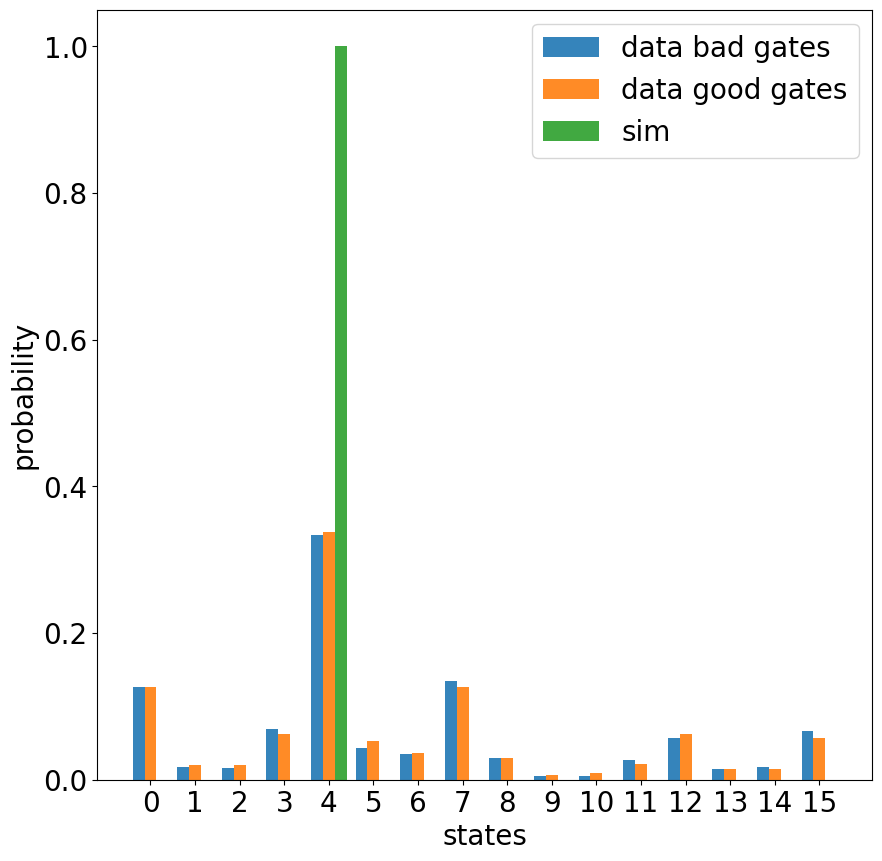

2024-09-16-165917_Line_002.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0]


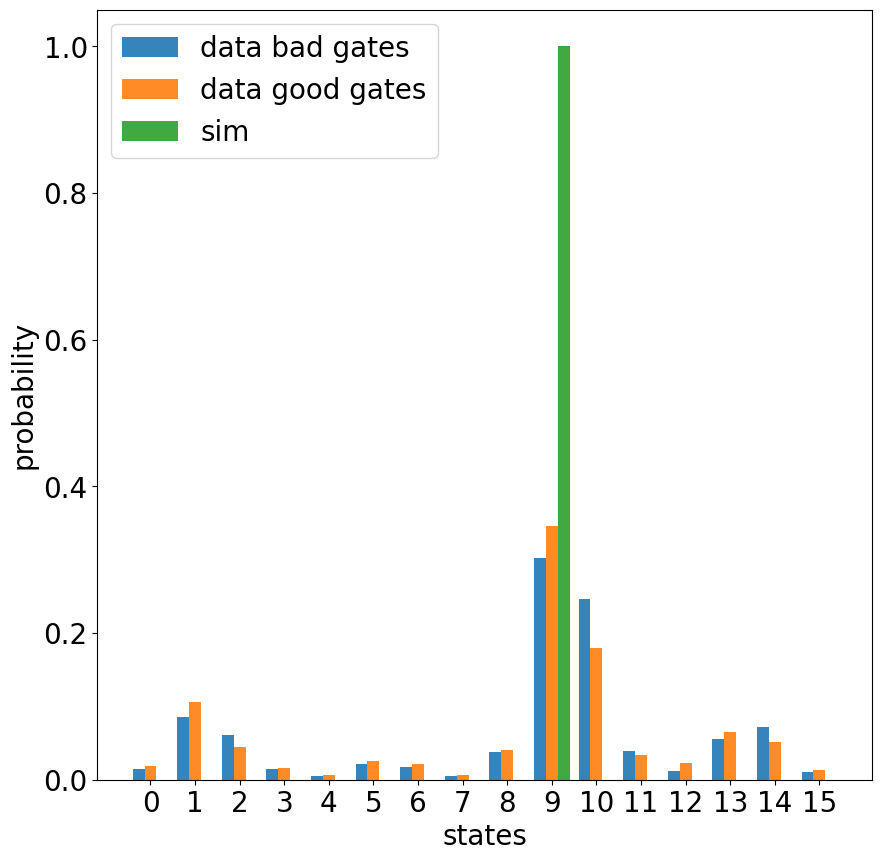

2024-09-16-170026_Line_003.txt
counts sim: [0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


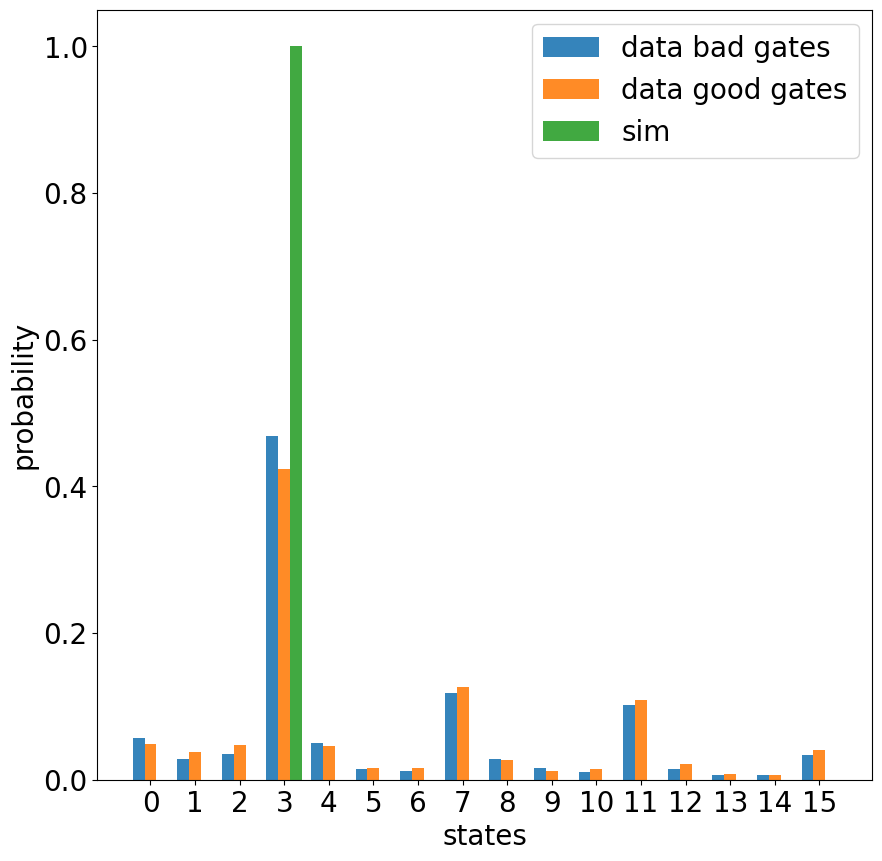

In [16]:
# filenames_data=filenames_d16_goodgates
# shots=2000
# for i in range (len(filenames_data)):
#     print (filenames_data[i])
#     a.Import("/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 BT__d=16/good gates/"+filenames_data[i],keep_file=True)
#     data_traced=Trace_Out(a,[0,1,2,3])
#     # counts=[round(shots*x) for x in  data_traced.population]
#     # print ("counts:", counts)
#     # counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
#     # # print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
#     # counts_d2.append(counts_ibm_mapping_dic)
    
#     a_s.Import(paf_data_d16+filenames_d16[i],keep_file=True)
#     data_traced_spam=Trace_Out(a_s,[0,1,2,3])
#     # counts_spam=[round(shots*x) for x in  data_traced_spam.population]
#     # counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
#     # counts_d2_spam.append(counts_ibm_mapping_dic_spam)

#     b_c.Interpret_GatesLab_Sequence(c_d16[i])
#     # print (circuit[i])
#     b=b_c.Simulate()
#     sim_traced=Trace_Out(b,[0,1,2,3])
#     counts_sim=[round(shots*x) for x in  sim_traced.population]
#     print ("counts sim:", counts_sim)
#     Display_States_Population(states=[data_traced,data_traced_spam,sim_traced],label=["data bad gates","data good gates","sim"])

spam results